In [1]:
# Importing libraries and APIs
import numpy as np
import pandas as pd 
import yfinance as yf
from datetime import datetime, timedelta

In [2]:
# FINDING TICKERS FOR EVERY STOCK THAT WILL BE USED
tickers = ['META', 'MSFT', 'JNJ', 
           'NSRGY', 'TM', 'SSNLF', 
           'BABA', 'TCS', 'VALE', 
           'XLK', 'IXJ', 'GOVT', 
           'VGLT', 'LQD', 'BNDX']

In [3]:
# SETTING END DATE
end_date = datetime.today()
print(end_date)

2024-10-10 15:11:25.567755


In [4]:
# SETTING START DATE 5 YEARS FROM NOW
start_date = end_date - timedelta(days = 5*365)
print(start_date)

2019-10-12 15:11:25.567755


In [5]:
# CREATING A DATAFRAME FOR ADJUSTED CLOSE PRICES
adj_close_df = pd.DataFrame()

In [6]:
# DOWNLOADING PRICES FOR EACH TICKER
for ticker in tickers:
    data = yf.download(ticker, start = start_date, end = end_date)
    adj_close_df[ticker] = data['Adj Close']

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%*******

In [7]:
print(adj_close_df)

                  META        MSFT         JNJ      NSRGY          TM  \
Date                                                                    
2019-10-14  182.729828  133.291183  113.913147  92.812660  135.070007   
2019-10-15  188.322983  135.220596  115.760574  92.935188  136.869995   
2019-10-16  188.981018  134.112564  117.791000  93.031464  136.759995   
2019-10-17  189.818466  133.424896  118.662437  91.998665  135.949997   
2019-10-18  185.292099  131.247147  111.281433  91.543526  135.770004   
...                ...         ...         ...        ...         ...   
2024-10-03  582.770020  416.540009  160.500000  98.750000  176.169998   
2024-10-04  595.940002  416.059998  160.289993  98.099998  180.020004   
2024-10-07  584.780029  409.540009  159.529999  97.480003  177.320007   
2024-10-08  592.890015  414.709991  159.690002  97.000000  175.759995   
2024-10-09  590.510010  417.459991  160.649994  97.470001  173.990005   

                   SSNLF        BABA        TCS   

# Calculate Lognormal Returns

## calculating log returns for each ticker

In [8]:
log_returns = np.log(adj_close_df / adj_close_df.shift(1))

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/pandas/core/internals/blocks.py:366: RuntimeWarning: invalid value encountered in log
  result = func(self.values, **kwargs)


## Dropping missing values

In [9]:
log_returns = log_returns.dropna()

# Calculating covariance matrix

In [10]:
cov_matrix = log_returns.cov()*252
print(cov_matrix)

           META      MSFT       JNJ     NSRGY        TM     SSNLF      BABA  \
META   0.206996  0.084650  0.017581  0.024896  0.035923  0.001192  0.071940   
MSFT   0.084650  0.092137  0.022325  0.024374  0.032927  0.000966  0.045036   
JNJ    0.017581  0.022325  0.038552  0.014048  0.013609  0.000854  0.011120   
NSRGY  0.024896  0.024374  0.014048  0.037318  0.015736  0.001362  0.019920   
TM     0.035923  0.032927  0.013609  0.015736  0.064319 -0.000479  0.034329   
SSNLF  0.001192  0.000966  0.000854  0.001362 -0.000479  0.039923  0.002402   
BABA   0.071940  0.045036  0.011120  0.019920  0.034329  0.002402  0.235964   
TCS    0.055958  0.035612  0.013964  0.017006  0.041000 -0.000100  0.072247   
VALE   0.047194  0.045266  0.021751  0.022847  0.038480 -0.000779  0.073967   
XLK    0.081504  0.076065  0.020983  0.023510  0.036767  0.000255  0.051434   
IXJ    0.034388  0.034841  0.023933  0.019534  0.021460  0.000312  0.023928   
GOVT  -0.001520 -0.001404 -0.001278  0.001088 -0.001

# Defining Portfolio Perfomance Metrics

## Calculating portfolio std

In [11]:
def standard_deviation(weights, cov_matrix):
    variance = weights.T @ cov_matrix @ weights
    return np.sqrt(variance)

## Calculating expected return

In [12]:
def excepted_return(weights, log_returns):
    return np.sum(log_returns.mean()*weights)*252

## Calculating Sharpe Ratio

In [13]:
def sharpe_ratio(weights, log_returns, cov_matrix, risk_free_rate):
    return(excepted_return(weights, log_returns) - risk_free_rate) / standard_deviation(weights, cov_matrix)

# Portfolio Optimization

## Setting Risk Free Rate

In [14]:
# Importing FRED API
from fredapi import Fred 

fred = Fred(api_key = '9ced124c5a728e16342d9fcf66ab176d')
ten_year_treasury_rate = fred.get_series_latest_release('GS10') / 100

# Setting risk free rate
risk_free_rate = ten_year_treasury_rate.iloc[-1]
print(risk_free_rate)



0.037200000000000004


## Using negative sharpe ratio

In [15]:
def neg_sharpe_ratio(weights, log_returns, cov_matrix, risk_free_rate):
    return -sharpe_ratio(weights, log_returns, cov_matrix, risk_free_rate)

## Setting contraints and bounds

In [16]:
constraints = {'type': 'eq', 'fun': lambda weights: np.sum(weights) - 1}
bounds = [(0.01, 0.5) for _ in range(len(tickers))]

## Set intial weights

In [17]:
intial_weights = np.array([1/len(tickers)]*len(tickers))
print(intial_weights)

[0.06666667 0.06666667 0.06666667 0.06666667 0.06666667 0.06666667
 0.06666667 0.06666667 0.06666667 0.06666667 0.06666667 0.06666667
 0.06666667 0.06666667 0.06666667]


## Optimizing weights to maximize Sharpe Ratio

In [18]:
from scipy.optimize import minimize

In [19]:
optimized_results = minimize(neg_sharpe_ratio, intial_weights, args = (log_returns, cov_matrix, risk_free_rate), method='SLSQP', constraints=constraints, bounds=bounds)

## Get the optimal weights

In [20]:
optimal_weights = optimized_results.x

# Vizualing

## Displaying analytics

In [21]:
print("Optimal Weights:")
for ticker, weight in zip(tickers, optimal_weights):
    print(f"{ticker}: {weight:4f}")

print()

optimal_portfolio_return = excepted_return(optimal_weights, log_returns)
optimal_portfolio_volatility = standard_deviation(optimal_weights, cov_matrix)
optimal_sharpe_ratio = sharpe_ratio(optimal_weights, log_returns, cov_matrix, risk_free_rate)

print(f"Expected Annual Return: {optimal_portfolio_return:4f}")
print(f"Expected Volatility: {optimal_portfolio_volatility:4f}")
print(f"Sharpe Ratio: {optimal_sharpe_ratio:4f}")

Optimal Weights:
META: 0.048779
MSFT: 0.331221
JNJ: 0.010000
NSRGY: 0.010000
TM: 0.010000
SSNLF: 0.010000
BABA: 0.010000
TCS: 0.010000
VALE: 0.010000
XLK: 0.500000
IXJ: 0.010000
GOVT: 0.010000
VGLT: 0.010000
LQD: 0.010000
BNDX: 0.010000

Expected Annual Return: 0.193705
Expected Volatility: 0.258834
Sharpe Ratio: 0.604653


- Annual expected return is 19.37%
- Expected risk is 25%
- Sharpe Ratio is 0.6 (not ideal but acceptable in this scenario)

In [30]:
# Converting np.array to dictionary
optimal_weights_dict = {ticker: weight for ticker, weight in zip(tickers, optimal_weights)}

# Creating a function to allocate a certain amount of money to each stock
def allocate_calculation(optimal_weights, total_investment):
    allocation = {ticker: weight * total_investment for ticker, weight in optimal_weights.items()}
    return allocation

# Total amount invested
total_investment = 1000000

# Calling the function
allocations = allocate_calculation(optimal_weights_dict, total_investment)

# Vizualizing results
for ticker, allocation in allocations.items():
    print(f"{ticker}: ${allocation:,.2f}")

# Sum the total allocation
total_allocated = sum(allocations.values())
print(f"Total Allocated: ${total_allocated:,.2f}")



META: $48,778.69
MSFT: $331,221.31
JNJ: $10,000.00
NSRGY: $10,000.00
TM: $10,000.00
SSNLF: $10,000.00
BABA: $10,000.00
TCS: $10,000.00
VALE: $10,000.00
XLK: $500,000.00
IXJ: $10,000.00
GOVT: $10,000.00
VGLT: $10,000.00
LQD: $10,000.00
BNDX: $10,000.00
Total Allocated: $1,000,000.00


## Plotting

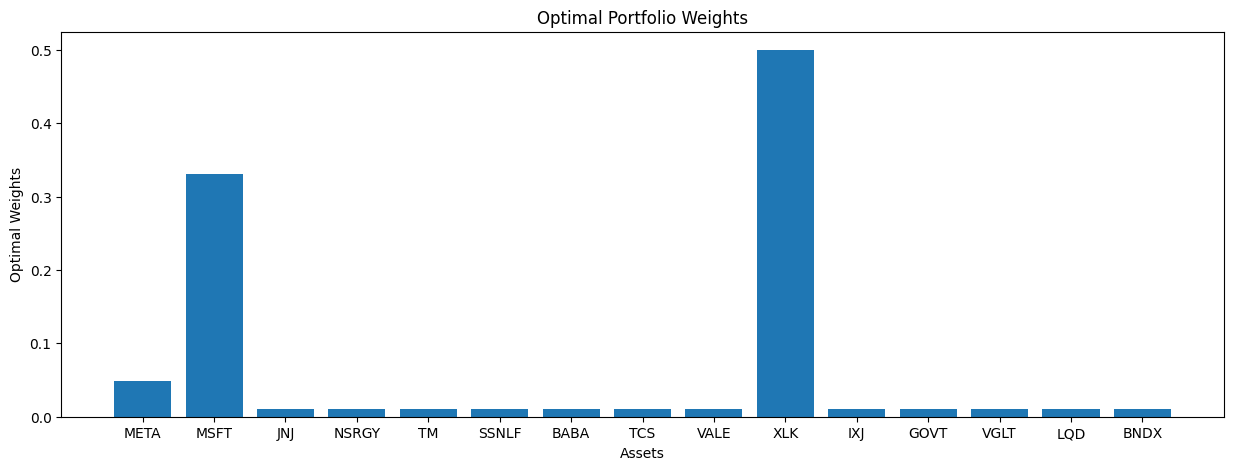

In [22]:
import matplotlib.pyplot as plt 

plt.figure(figsize=(15,5))
plt.bar(tickers, optimal_weights)

plt.xlabel('Assets')
plt.ylabel('Optimal Weights')
plt.title('Optimal Portfolio Weights')

plt.show()

## Plotting the Efficient Frontier

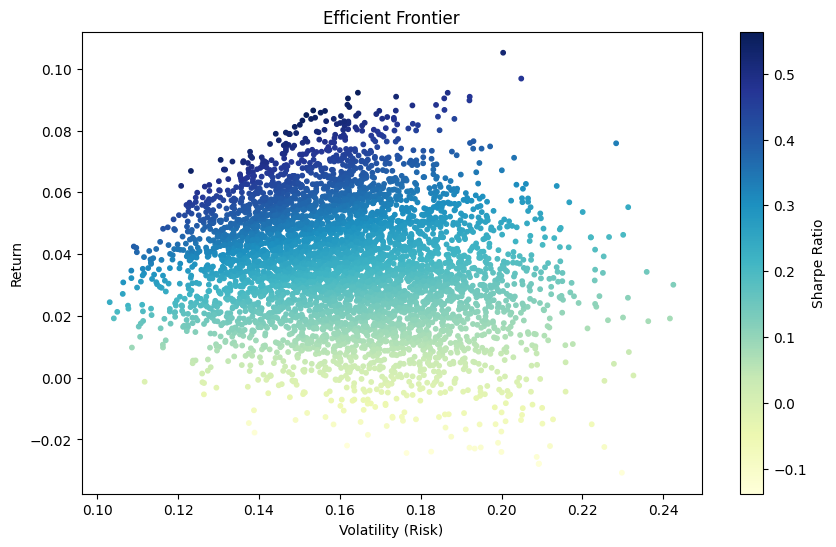

In [23]:
# Number of portfolios to simulate
num_portfolios = 5000

# Create arrays to store portfolio metrics
results = np.zeros((3, num_portfolios))
weights_record = []

# Loop to generate random portfolios
for i in range(num_portfolios):
    # Generate random weights
    weights = np.random.random(len(tickers))
    weights /= np.sum(weights)  # Normalize so the sum of weights is 1
    weights_record.append(weights)

    # Expected portfolio return
    portfolio_return = np.sum(weights * log_returns.mean()) * 252

    # Portfolio volatility (risk)
    portfolio_stddev = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))

    # Sharpe ratio (assuming risk-free rate is 0 for simplicity)
    sharpe_ratio = portfolio_return / portfolio_stddev

    # Store the results
    results[0, i] = portfolio_return
    results[1, i] = portfolio_stddev
    results[2, i] = sharpe_ratio

# Plotting the Efficient Frontier
plt.figure(figsize=(10, 6))
plt.scatter(results[1, :], results[0, :], c=results[2, :], cmap='YlGnBu', marker='o', s=10)
plt.colorbar(label='Sharpe Ratio')
plt.title('Efficient Frontier')
plt.xlabel('Volatility (Risk)')
plt.ylabel('Return')
plt.show()


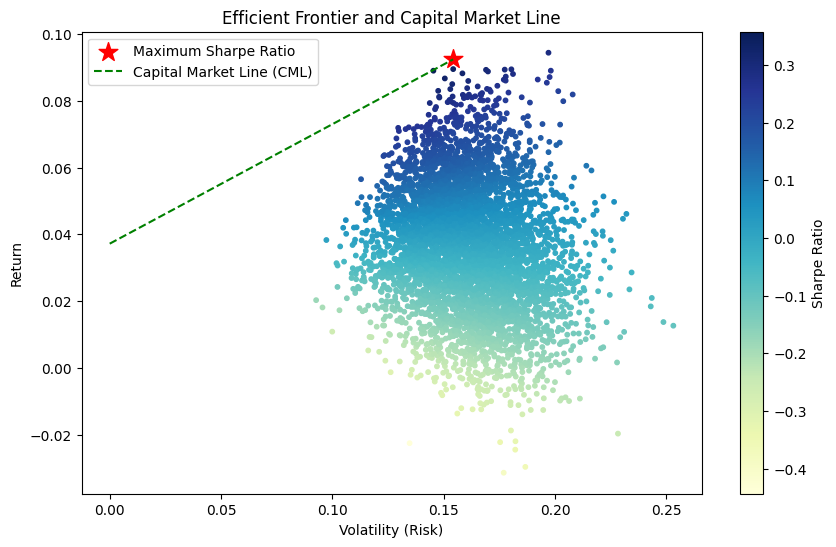

In [24]:


# Number of portfolios to simulate
num_portfolios = 5000

# Create arrays to store portfolio metrics
results = np.zeros((3, num_portfolios))
weights_record = []

# Loop to generate random portfolios
for i in range(num_portfolios):
    # Generate random weights
    weights = np.random.random(len(tickers))
    weights /= np.sum(weights)  # Normalize so the sum of weights is 1
    weights_record.append(weights)

    # Expected portfolio return
    portfolio_return = np.sum(weights * log_returns.mean()) * 252

    # Portfolio volatility (risk)
    portfolio_stddev = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))

    # Sharpe ratio (assuming risk-free rate is 0 for simplicity)
    sharpe_ratio = (portfolio_return - risk_free_rate) / portfolio_stddev

    # Store the results
    results[0, i] = portfolio_return
    results[1, i] = portfolio_stddev
    results[2, i] = sharpe_ratio

# Find the index of the portfolio with the highest Sharpe Ratio
max_sharpe_idx = np.argmax(results[2])
max_sharpe_return = results[0, max_sharpe_idx]
max_sharpe_volatility = results[1, max_sharpe_idx]

# Plotting the Efficient Frontier
plt.figure(figsize=(10, 6))
plt.scatter(results[1, :], results[0, :], c=results[2, :], cmap='YlGnBu', marker='o', s=10)
plt.colorbar(label='Sharpe Ratio')

# Highlight the portfolio with the maximum Sharpe Ratio
plt.scatter(max_sharpe_volatility, max_sharpe_return, c='red', marker='*', s=200, label='Maximum Sharpe Ratio')

# Plot the Capital Market Line (CML)
# Risk-free rate is assumed to be calculated or known
cml_x = np.linspace(0, max_sharpe_volatility, 100)
cml_y = risk_free_rate + (max_sharpe_return - risk_free_rate) / max_sharpe_volatility * cml_x
plt.plot(cml_x, cml_y, label='Capital Market Line (CML)', color='green', linestyle='--')

plt.title('Efficient Frontier and Capital Market Line')
plt.xlabel('Volatility (Risk)')
plt.ylabel('Return')
plt.legend()
plt.show()


## Checking how correlated the stocks are to each other

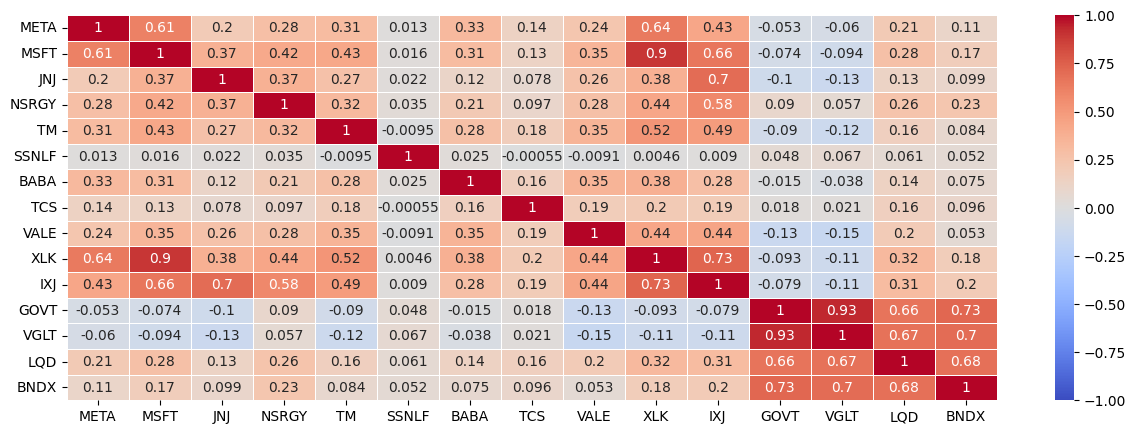

In [25]:
import seaborn as sns

correlation_matrix = log_returns.corr()

plt.figure(figsize=(15,5))
sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, linewidths=0.5)
plt.show()

- For this attempt I changed the swapped some stocks in the original portfolio to give it a more diverse profile. I also set a minimum weight of 0.01 for all of the stocks to ensure that all stocks were in use.
- This seemed to improve the safety of this portfolio where the expected volatility was 25% compared to 35% in the first portfolio
- Although this portfolio is safer, its expected return is only 19%.